# Market Segmentation Analysis

### Case Study: Fast Food (McDonalds_case_study)

Importing necessary libraries and Exploring Data

In [1]:
import os
import requests
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture
from sklearn.metrics import confusion_matrix
from sklearn.metrics import silhouette_score
from sklearn.metrics import adjusted_rand_score
from sklearn.preprocessing import StandardScaler
from statsmodels.graphics.mosaicplot import mosaic

reading the mcdonalds.csv and columns have in it

In [2]:
df = pd.read_csv('mcdonalds.csv')
df.columns

Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender'],
      dtype='object')

In [3]:
warnings.filterwarnings("ignore")

In [4]:
df.head(10)

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male
5,Yes,Yes,No,Yes,No,Yes,Yes,Yes,No,No,No,+2,55,Every three months,Male
6,Yes,Yes,Yes,Yes,No,Yes,No,Yes,Yes,Yes,No,+2,56,Every three months,Female
7,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,No,I love it!+5,23,Once a week,Female
8,No,No,No,Yes,Yes,No,No,No,Yes,No,Yes,I hate it!-5,58,Once a year,Male
9,Yes,Yes,No,Yes,Yes,Yes,No,Yes,Yes,No,No,+1,32,Every three months,Female


In [5]:
df.shape

(1453, 15)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   yummy           1453 non-null   object
 1   convenient      1453 non-null   object
 2   spicy           1453 non-null   object
 3   fattening       1453 non-null   object
 4   greasy          1453 non-null   object
 5   fast            1453 non-null   object
 6   cheap           1453 non-null   object
 7   tasty           1453 non-null   object
 8   expensive       1453 non-null   object
 9   healthy         1453 non-null   object
 10  disgusting      1453 non-null   object
 11  Like            1453 non-null   object
 12  Age             1453 non-null   int64 
 13  VisitFrequency  1453 non-null   object
 14  Gender          1453 non-null   object
dtypes: int64(1), object(14)
memory usage: 170.4+ KB


In [7]:
df = df.replace({"Yes": 1, "No": 0})
df.head(3)

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,Every three months,Female
1,1,1,0,1,1,1,1,1,1,0,0,+2,51,Every three months,Female
2,0,1,1,1,1,1,0,1,1,1,0,+1,62,Every three months,Female


In [8]:
df1 = df.iloc[:, :11]
temp = df1.mean().round(2)
temp

yummy         0.55
convenient    0.91
spicy         0.09
fattening     0.87
greasy        0.53
fast          0.90
cheap         0.60
tasty         0.64
expensive     0.36
healthy       0.20
disgusting    0.24
dtype: float64

In [9]:
scaler = StandardScaler()
df2 = scaler.fit_transform(df1)

pca = PCA()
df2 = pca.fit_transform(df2)

pca_df = pd.DataFrame(df2, columns=df1.columns)
pca_df.describe()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
count,1.453000e+03,1.453000e+03,1.453000e+03,1.453000e+03,1.453000e+03,1.453000e+03,1.453000e+03,1.453000e+03,1.453000e+03,1.453000e+03,1.453000e+03
mean,-4.401159e-17,-8.802319e-17,7.579775e-17,-9.291337e-17,2.200580e-17,2.689597e-17,-4.156651e-17,2.200580e-17,-1.381475e-16,-1.106403e-16,-4.645668e-17
std,1.677250e+00,1.277868e+00,1.175207e+00,1.040053e+00,9.586196e-01,8.846128e-01,8.457741e-01,7.698704e-01,7.240648e-01,5.548094e-01,5.069825e-01
min,-2.883694e+00,-2.229399e+00,-1.852180e+00,-1.481192e+00,-2.808926e+00,-2.775970e+00,-2.791864e+00,-2.037274e+00,-2.291970e+00,-1.596087e+00,-1.788916e+00
25%,-1.082756e+00,-8.196100e-01,-8.166025e-01,-7.415504e-01,-6.594894e-01,-6.525637e-01,-5.180840e-01,-4.690456e-01,-4.512112e-01,2.327974e-02,-6.189398e-02
50%,-2.275531e-01,-4.300592e-02,-1.739581e-01,-1.634068e-01,-2.368836e-02,-6.102541e-02,3.398968e-02,2.066852e-01,9.809878e-02,1.212930e-01,5.602312e-02
75%,1.079822e+00,9.227436e-01,6.062742e-01,1.380806e-01,4.441573e-01,4.651667e-01,6.711110e-01,5.707646e-01,4.033967e-01,1.917207e-01,1.920805e-01
max,4.566454e+00,4.102422e+00,4.199369e+00,4.202991e+00,3.606405e+00,4.201958e+00,3.693790e+00,2.829568e+00,2.462379e+00,1.849848e+00,1.834070e+00


In [10]:
pd.DataFrame(
    pca.components_, 
    columns=[f'PC{i}' for i in range(1, 12)], 
    index=pca_df.columns
)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
yummy,-0.406955,-0.308827,-0.023320,0.177861,0.267796,-0.213039,-0.289134,-0.426115,0.290944,-0.266839,0.410744
convenient,0.282615,-0.045682,0.069982,-0.205590,-0.136300,-0.282441,-0.575032,0.242199,0.567528,0.201031,-0.143888
spicy,-0.259588,-0.317151,0.020170,-0.608077,-0.389568,-0.211395,0.125157,-0.269648,-0.183298,0.367814,0.090299
fattening,0.026237,-0.009424,0.845496,-0.023396,0.330854,0.090363,0.114477,0.072691,0.035510,0.301990,0.235231
greasy,0.346857,-0.437148,-0.185551,0.086934,0.343713,-0.568939,0.256981,0.286099,-0.207362,0.051787,0.105843
fast,-0.124916,0.188966,0.438661,0.107520,-0.278329,-0.572734,0.020657,-0.053053,-0.171160,-0.446166,-0.328041
cheap,0.159878,-0.661814,0.214188,-0.023851,-0.307300,0.392436,-0.008895,0.197364,0.015198,-0.449446,-0.017070
tasty,0.016587,0.150033,-0.027835,-0.720478,0.487275,0.055976,-0.064667,0.059289,-0.061727,-0.446110,-0.079122
expensive,-0.195341,-0.336539,0.025239,0.105052,0.346137,0.099235,-0.062027,-0.213587,-0.009675,0.219269,-0.780777
healthy,0.691446,0.028831,0.058187,-0.020311,-0.015160,0.017917,0.060323,-0.713426,0.029581,-0.054544,-0.016028


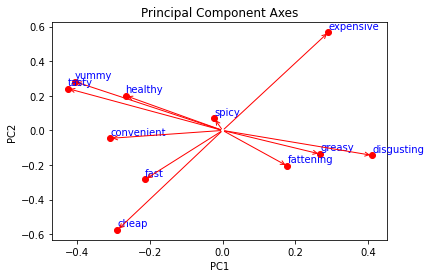

In [11]:
scale = 1

for i,j in enumerate(pca_df.columns):
    plt.text(
        pca.components_[0, :][i]*scale, 
        (pca.components_[1, :][i]+0.02)*scale, 
        j, color='blue'
    )
    # plt.arrow(0, 0, pca.components_[0, :][i]*scale, pca.components_[1, :][i]*scale, color='red')
    plt.annotate(
        '', xytext=(0, 0), 
        xy=(pca.components_[0, :][i]*scale, 
        pca.components_[1, :][i]*scale), 
        arrowprops=dict(
            arrowstyle="->", 
            color='red'
        )
    )
plt.scatter(
    pca.components_[0, :]*scale, 
    pca.components_[1, :]*scale, 
    color='red'
)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Principal Component Axes')
plt.show()

Exracting the segemnt

In [12]:
np.random.seed(0)
k_range = range(2, 9)
inertias = []
k_result = []
silhouette_scores = []
for k in k_range:
    model = KMeans(
        n_clusters=k, 
        n_init=10, 
        random_state=0)
    model.fit(pca_df)
    labels = model.predict(pca_df)
    silhouette_score_ = silhouette_score(
        pca_df, 
        labels
    )
    silhouette_scores.append(silhouette_score_)
    inertias.append(model.inertia_)
    k_result.append(labels)

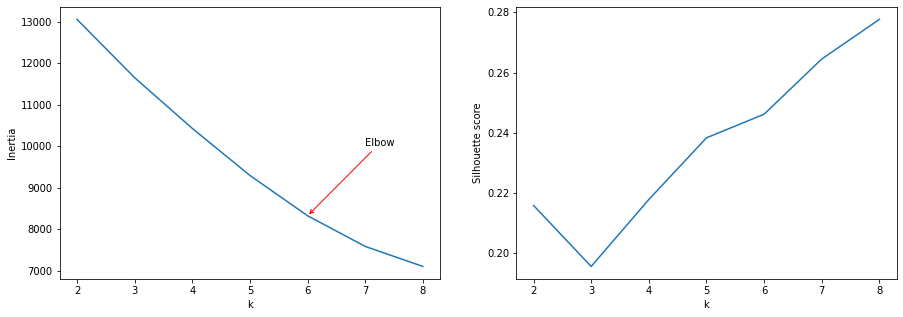

In [13]:
fig, axs = plt.subplots(1, 2)
fig.set_size_inches(15, 5)
axs[0].plot(range(2, 9), inertias)
axs[0].annotate(
    'Elbow', xytext=(7, 10000), xy=(6, inertias[4]), 
    arrowprops=dict(arrowstyle="->", color='red'))
axs[1].plot(range(2, 9), silhouette_scores)
axs[0].set(xlabel='k', ylabel='Inertia')
axs[1].set(xlabel='k', ylabel='Silhouette score');

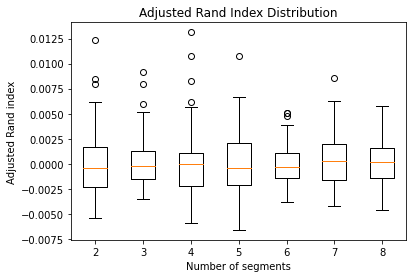

In [14]:
n_boot = 100
ARI_scores = []
for labels in k_result:
    ari_boot = []
    for _ in range(n_boot):
        random_sample = np.random.choice(
            labels, 
            size=len(labels), 
            replace=True
        )
        ari = adjusted_rand_score(
            labels, 
            random_sample
        )
        ari_boot.append(ari)
    ARI_scores.append(ari_boot)

plt.boxplot(ARI_scores, labels=range(2, 9))
plt.xlabel('Number of segments')
plt.ylabel('Adjusted Rand index')
plt.title('Adjusted Rand Index Distribution')
plt.show()

Profiling segments

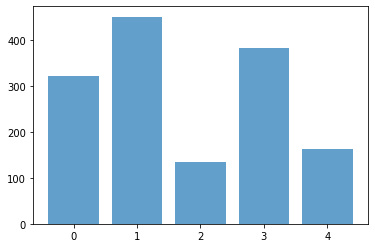

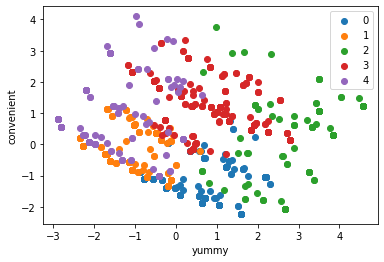

In [15]:
k5 = KMeans(n_clusters=5)
k5.fit(pca_df)
l5 = k5.predict(pca_df)

x = range(5)
height = []
for i in range(5):
    height.append(sum(l5 == i))
plt.bar(x, height, alpha=0.7);
plt.show()

for i in range(5):
    temp = pca_df[['yummy', 'convenient']][l5 == i]
    plt.scatter(
        temp['yummy'], 
        temp['convenient'], 
        label=i
    )
plt.xlabel('yummy')
plt.ylabel('convenient')
plt.legend();
plt.show()

Describing Segments

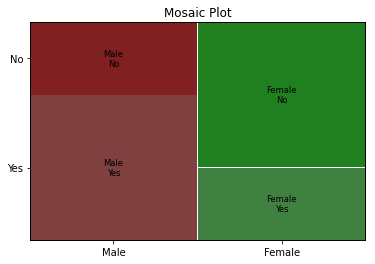

In [16]:
data = {
    'Gender': ['Male', 'Female', 'Male', 'Female', 'Male', 'Female'],
    'Preference': ['Yes', 'No', 'Yes', 'No', 'No', 'Yes']
}
example_df = pd.DataFrame(data)

mosaic(example_df, ['Gender', 'Preference'], title='Mosaic Plot')

plt.show()

selecting (the) Target Segment(s)

In [17]:
df2 = df
df2['segments'] = l5
df2.head(10)

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender,segments
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,Every three months,Female,0
1,1,1,0,1,1,1,1,1,1,0,0,+2,51,Every three months,Female,1
2,0,1,1,1,1,1,0,1,1,1,0,+1,62,Every three months,Female,3
3,1,1,0,1,1,1,1,1,0,0,1,+4,69,Once a week,Female,1
4,0,1,0,1,1,1,1,0,0,1,0,+2,49,Once a month,Male,0
5,1,1,0,1,0,1,1,1,0,0,0,+2,55,Every three months,Male,1
6,1,1,1,1,0,1,0,1,1,1,0,+2,56,Every three months,Female,3
7,1,1,0,1,1,1,1,1,0,0,0,I love it!+5,23,Once a week,Female,1
8,0,0,0,1,1,0,0,0,1,0,1,I hate it!-5,58,Once a year,Male,2
9,1,1,0,1,1,1,0,1,1,0,0,+1,32,Every three months,Female,3


In [18]:
df2.Like.unique()

array(['-3', '+2', '+1', '+4', 'I love it!+5', 'I hate it!-5', '-2', '+3',
       '0', '-4', '-1'], dtype=object)

In [19]:
df2.Like = df2.Like.str.extract(r'([-\d]+)').astype(int)

In [20]:
df2.VisitFrequency.unique()

array(['Every three months', 'Once a week', 'Once a month', 'Once a year',
       'More than once a week', 'Never'], dtype=object)

In [21]:
df2.VisitFrequency = df2.VisitFrequency.replace({
    'Every three months':1/(4*3), 
    'Once a week':1, 
    'Once a month':1/4, 
    'Once a year':1/52,
    'More than once a week':2, 
    'Never':0
})

In [22]:
df2.head(3)

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender,segments
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,0.083333,Female,0
1,1,1,0,1,1,1,1,1,1,0,0,2,51,0.083333,Female,1
2,0,1,1,1,1,1,0,1,1,1,0,1,62,0.083333,Female,3


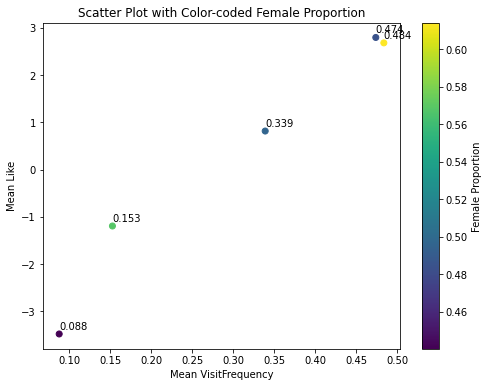

In [23]:
visit_means = (df2.groupby("segments")["VisitFrequency"]
               .mean())
like_means = df2.groupby("segments")["Like"].mean()
female_means = (df2.groupby("segments")["Gender"]
                .apply(lambda x: (x == "Female")
                .mean()))

plt.figure(figsize=(8, 6))
plt.scatter(
    visit_means, 
    like_means, 
    c=female_means, 
    cmap="viridis"
)
plt.xlabel("Mean VisitFrequency")
plt.ylabel("Mean Like")
plt.title("Scatter Plot with Color-coded Female Proportion")
plt.colorbar(label="Female Proportion")
for i,j,k in zip(
    visit_means, 
    like_means, 
    visit_means
):
    plt.text(i, j+0.1, round(k, 3))
plt.show()